# Sommaire :
 
 **<a href="#C1">Importation des données</a>**
 
 **<a href="#C2">Description des données</a>**
 
 
 **Partie 1 : <a href="#C1">P1 - Filtre du jeu de données</a>**
 
 
 **Partie 2 : <a href="#C2">P2 - Validation du jeu de données</a>**
 
 - <a href="#P2C1">P2C1 Erreurs de type</a>
 
 
 - <a href="#P2C2">P2C2 Doublons</a>
 
 
 - <a href ="#P2C3"> P2C3 Valeurs manquantes</a>
     
     <a href ="#P2C31"> 1.Suppresion de ligne </a>
     
     <a href ="#P2C32"> 2. Remplacement de valeurs NaN de colonne </a>
     
     <a href= "#P2C321"> a.) Par une valeur quelconque </a>
     
     <a href= "#P2C322"> b.) Par la valeur 0 </a>
     
     <a href= "#P2C323"> c.)  Par la valeur d'une autre colonne </a>
     
     <a href= "#P2C324"> d.) Par la moyenne </a>
     
     <a href= "#P2C325"> e.) Par la méthode KNN Imputer </a>
     
     <a href= "#P2C326"> f.) Selon des conditions </a>
     

     
     
     
  - <a href ="#P2C4"> P2C4 Détection d'outliers </a>  

 


#  <a name="C1"> Importation des données</a>

Les données que nous allons utiliser tout au long de ce cours se trouvent dans un fichier csv.

Nous Importons dans un premier temps l'ensemble des librairies qui vont nous servir durant l'entièreté de ce cours ;

Ensuite nous pouvons charger le jeu de données, dans un dataframe que nous nommerons ici `data`et affichons les 5 premières lignes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

data = pd.read_csv('products.csv',sep='\t')
data.head()

C:\Users\dmedc\AppData\Local\Temp\ipykernel_29320\1163428524.py:8: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('products.csv',sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.shape

(320772, 162)

Comme vous pouvez le voir via la commande ci dessus, nous avons 320.772 transactions, renseignées sur 162 variables différentes. 

# <a name="C2">Description des données</a>

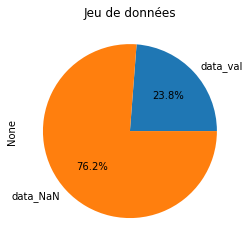

In [3]:
data_val = data.count().sum() # Nbre de valeurs
data_NaN = data.isnull().sum().sum()  # Nbre de valeurs manquantes

# Mettre sous forme de serie
S1 = pd.Series([data_val, data_NaN],index=["data_val","data_NaN"])

# Diagramme en secteur
S1.plot.pie(autopct="%1.1f%%")
plt.title("Jeu de données")
plt.show()

# <a name="C1">P1 - Filtre du jeu de données</a>

**Déterminer les Variables Pertinentes**

Voyons la liste des variables

In [4]:
# Liste des colonnes (cette liste correspond à la liste de nos variables)
liste = data.columns.values
liste

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

Nous avons déterminer **trois catégories** de variables pertinantes. Ci-dessous les listes des trois catégories

In [5]:
Liste_Inf =['code','product_name','origins','categories'] 

Liste_Ingred = ['additives_n','ingredients_from_palm_oil_n']

Liste_Nutrit = ['fat_100g', 'saturated-fat_100g','alcohol_100g','trans-fat_100g','cholesterol_100g','glucose_100g', 'fructose_100g',
                'sugars_100g','omega-3-fat_100g','fiber_100g','proteins_100g','energy-from-fat_100g','carbohydrates_100g',
                'vitamin-d_100g','energy_100g','nutrition-score-fr_100g','nutrition_grade_fr']

# Fusionner les trois listes en une seule
Liste_Inf.extend(Liste_Ingred)
Liste_Inf.extend(Liste_Nutrit)

In [6]:
# Afficher la df avec les variables pertinantes
data_filtre = data[Liste_Inf]
data_filtre

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,alcohol_100g,trans-fat_100g,...,sugars_100g,omega-3-fat_100g,fiber_100g,proteins_100g,energy-from-fat_100g,carbohydrates_100g,vitamin-d_100g,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,3087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,0.0,0.0,28.57,28.57,NaN,0.0,...,14.29,NaN,3.6,3.57,NaN,64.29,NaN,2243.0,14.0,d
2,4559,Peanuts,NaN,NaN,0.0,0.0,17.86,0.00,NaN,0.0,...,17.86,NaN,7.1,17.86,NaN,60.71,NaN,1941.0,0.0,b
3,16087,Organic Salted Nut Mix,NaN,NaN,0.0,0.0,57.14,5.36,NaN,NaN,...,3.57,NaN,7.1,17.86,NaN,17.86,NaN,2540.0,12.0,d
4,16094,Organic Polenta,NaN,NaN,0.0,0.0,1.43,NaN,NaN,NaN,...,NaN,NaN,5.7,8.57,NaN,77.14,NaN,1552.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,Tomato & ricotta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,0.0,0.0,0.00,0.00,NaN,0.0,...,0.00,NaN,0.0,0.00,NaN,0.00,NaN,0.0,0.0,b
320769,9970229501521,乐吧泡菜味薯片,NaN,Potato chips,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_filtre.shape

(320772, 23)

**Qualité des données**

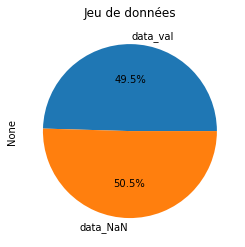

In [8]:
data_val = data_filtre.count().sum() # Nbre de valeurs
data_NaN = data_filtre.isnull().sum().sum()  # Nbre de valeurs manquantes

# Mettre sous forme de serie
S1 = pd.Series([data_val, data_NaN],index=["data_val","data_NaN"])

# Diagramme en secteur
S1.plot.pie(autopct="%1.1f%%")
plt.title("Jeu de données")
plt.show()

Nous sommes passer de 162 variables à **23 variables**

# <a name="C2">P2 - Validation du jeu de données</a>

## <a name="P2C1">P2C1 Erreurs de type</a>

In [9]:
data_filtre.dtypes

code                            object
product_name                    object
origins                         object
categories                      object
additives_n                    float64
ingredients_from_palm_oil_n    float64
fat_100g                       float64
saturated-fat_100g             float64
alcohol_100g                   float64
trans-fat_100g                 float64
cholesterol_100g               float64
glucose_100g                   float64
fructose_100g                  float64
sugars_100g                    float64
omega-3-fat_100g               float64
fiber_100g                     float64
proteins_100g                  float64
energy-from-fat_100g           float64
carbohydrates_100g             float64
vitamin-d_100g                 float64
energy_100g                    float64
nutrition-score-fr_100g        float64
nutrition_grade_fr              object
dtype: object

##### Les types correspondent. Il n'y a pas d'erreur.

## <a name="P2C2">P2C2 Doublons  </a>

Regardons à présent si certaines produits sont apparues en doublons. Pour cela, on se concentrera sur des informations qui ne peuvent normalement pas être doublés, comme : 'code' et 'product_name' 

In [10]:
data_filtre.loc[data_filtre[['code','product_name']].duplicated(),:]

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,alcohol_100g,trans-fat_100g,...,sugars_100g,omega-3-fat_100g,fiber_100g,proteins_100g,energy-from-fat_100g,carbohydrates_100g,vitamin-d_100g,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr
1337,9800800056,Hazelnut Spread + Breadsticks,NaN,NaN,0.0,0.0,26.92,9.62,NaN,0.0,...,44.23,NaN,3.80,7.690,NaN,65.38,NaN,2171.0,21.0,e
2877,11110676177,Strawberry Preserves,NaN,NaN,2.0,0.0,0.00,NaN,NaN,NaN,...,50.00,NaN,NaN,0.000,NaN,55.00,NaN,1046.0,NaN,NaN
4547,11110881373,Vindaloo Sauce,NaN,NaN,2.0,0.0,6.78,0.42,NaN,0.0,...,4.24,NaN,1.70,1.690,NaN,9.32,NaN,427.0,4.0,c
20399,23923201965,Organic Sunny Days Snack Bars,NaN,NaN,6.0,0.0,7.89,0.00,NaN,0.0,...,31.58,NaN,0.00,5.260,NaN,68.42,NaN,1540.0,13.0,d
21583,24463061163,Sriracha Hot Chili Sauce,California,"Groceries,Sauces,Hot sauces",2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,b
34644,37600110754,Creamy Peanut Butter,NaN,Peanut butter,0.0,0.0,50.00,9.38,NaN,0.0,...,9.38,NaN,6.25,21.900,1830.0,18.80,NaN,2480.0,18.0,d
71872,70650800312,Coconut Ginger Rice,NaN,NaN,4.0,0.0,6.00,2.00,NaN,0.0,...,2.00,NaN,2.00,8.000,NaN,72.00,NaN,1674.0,11.0,d
71874,70650800367,Sweet Chili Sauce,NaN,NaN,1.0,0.0,0.00,NaN,NaN,0.0,...,54.55,NaN,NaN,NaN,NaN,54.55,NaN,987.0,NaN,NaN
79579,72220009989,Great Seed Bread,NaN,NaN,1.0,0.0,8.75,0.00,NaN,0.0,...,5.00,NaN,5.00,5.000,NaN,42.50,NaN,1151.0,0.0,b
83165,73214001347,Deli-Sliced Hot Jalapeno Peppers,NaN,NaN,2.0,0.0,0.00,0.00,NaN,0.0,...,0.00,NaN,0.00,0.000,NaN,3.33,NaN,71.0,10.0,c


In [11]:
data_filtre.loc[data_filtre[['code','product_name']].duplicated(),:].shape

(36, 23)

##### Il y a 36 lignes de doublons.
Nous allons procéder à leur suppression

In [12]:
data_filtre.drop_duplicates(subset=['code','product_name'], inplace=True, ignore_index=True)

C:\Users\dmedc\AppData\Local\Temp\ipykernel_29320\1449428207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtre.drop_duplicates(subset=['code','product_name'], inplace=True, ignore_index=True)


In [13]:
data = data_filtre

## <a name ="P2C3"> P2C3 Valeurs manquantes </a>

On va vérifier si notre jeu de données contient des valeurs manquantes :

In [14]:
data.isnull().sum()

code                                4
product_name                    17762
origins                        298565
categories                     236345
additives_n                     71814
ingredients_from_palm_oil_n     71814
fat_100g                        76861
saturated-fat_100g              91195
alcohol_100g                   316603
trans-fat_100g                 177451
cholesterol_100g               176658
glucose_100g                   320710
fructose_100g                  320698
sugars_100g                     75781
omega-3-fat_100g               319895
fiber_100g                     119863
proteins_100g                   60844
energy-from-fat_100g           319880
carbohydrates_100g              77164
vitamin-d_100g                 313680
energy_100g                     59639
nutrition-score-fr_100g         99540
nutrition_grade_fr              99540
dtype: int64

### <a name ="P2C31"> 1. Suppression de ligne </a>
**Variable 'Code'**

In [15]:
data.loc[data['code'].isnull(),:]

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,alcohol_100g,trans-fat_100g,...,sugars_100g,omega-3-fat_100g,fiber_100g,proteins_100g,energy-from-fat_100g,carbohydrates_100g,vitamin-d_100g,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr
189052,NaN,"Belgique,France",[ lait-entier -> fr:lait-entier ] [ lait ->...,125 g (1 pot),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189087,NaN,France,[ lait-entier -> fr:lait-entier ] [ lait ->...,125 g (1 pot),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.137,NaN,NaN,NaN,NaN,NaN,NaN
189093,NaN,"Belgique,France,Suisse",[ lait-entier-69-5 -> fr:lait-entier-69-5 ] ...,125 g (1 pot),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189371,NaN,"France,Suisse",[ lait-entier -> fr:lait-entier ] [ lait ->...,125 g (1 pot),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Supprimer les quatre colonnes à valeurs manquantes
data1=data.dropna(subset=['code'])
data = data1

# Mise à jour des indexes
data = data.reset_index(drop = True)

### <a name ="P2C32"> 2. Remplacement de valeurs NaN de colonne </a>

#### <a name ="P2C321"> a.) Par une valeur quelconque <a/>


**Variables qualitatives : 'product_name' , 'origins' et 'categories'**

Pour les variables : 'product_name' et 'origins' nous allons remplacer les valeurs manquantes par 'Aucune'.

In [17]:
data[['product_name','origins','categories']]= data[['product_name' ,'origins','categories']].fillna('Aucune')

#### <a name= "P2C322"> b.) Par la valeur 0 </a>

**Variables quantitative discretes : 'additives_n' et 'ingredients_from_palm_oil_n'**

In [18]:
# Nombre de valeur nulles des 2 variables
nb1 = data['additives_n']==0
nb2 = data['ingredients_from_palm_oil_n']==0
print(nb1.sum())
print(nb2.sum())

94256
244087


In [19]:
 # Remplacer les valeurs NaN par 0

data[['additives_n','ingredients_from_palm_oil_n']] = data[['additives_n','ingredients_from_palm_oil_n']].fillna(0)

#### <a name= "P2C323"> c.) Par la valeur d'une autre colonne </a>

**Variables : 'fat_100g' et 'saturated-fat_100g'**

In [20]:
data.loc[data['fat_100g']==data['saturated-fat_100g']].shape

(42725, 23)

Nous avons 41.518 produits qui ont des valeurs identiques pour ces deux variables.

Nous allons remplacer les valeurs NaN de chacune des variables par la valeur de l'autre. 

In [21]:
data.loc[data['fat_100g'].isnull(),'fat_100g'] = data['saturated-fat_100g']
data.loc[data['saturated-fat_100g'].isnull(),'saturated-fat_100g']=data['fat_100g']

print(data['saturated-fat_100g'].isnull().sum())
print('-------------------------------------------------------')
print(data['fat_100g'].isnull().sum())

59511
-------------------------------------------------------
59511


#### <a name= "P2C324"> d.) Par la moyenne </a>

**Variables quantitatives continues : 'fat_100g' et 'saturated-fat_100g'**

Nous remplacerons les valeurs NaN restantes par la moyenne

In [22]:
data.loc[data['fat_100g'].isnull(),'fat_100g']=data['fat_100g'].mean()
data.loc[data['saturated-fat_100g'].isnull(),'saturated-fat_100g']=data['saturated-fat_100g'].mean()

In [23]:
print(data['fat_100g'].isnull().sum())
print('--------')
print(data['saturated-fat_100g'].isnull().sum())

0
--------
0


**Variables quantitatives continues : Les autres Variables de nutriments**

In [24]:
data.loc[data['trans-fat_100g'].isnull(),'trans-fat_100g'] = data['trans-fat_100g'].mean()
data.loc[data['alcohol_100g'].isnull(),'alcohol_100g']=data['alcohol_100g'].mean()
data.loc[data['glucose_100g'].isnull(),'glucose_100g'] = data['glucose_100g'].mean()
data.loc[data['cholesterol_100g'].isnull(),'cholesterol_100g']=data['cholesterol_100g'].mean()
data.loc[data['fructose_100g'].isnull(),'fructose_100g'] = data['fructose_100g'].mean()
data.loc[data['sugars_100g'].isnull(),'sugars_100g']=data['sugars_100g'].mean()

data.loc[data['omega-3-fat_100g'].isnull(),'omega-3-fat_100g'] = data['omega-3-fat_100g'].mean()
data.loc[data['fiber_100g'].isnull(),'fiber_100g']=data['fiber_100g'].mean()
data.loc[data['proteins_100g'].isnull(),'proteins_100g'] = data['proteins_100g'].mean()

data.loc[data['energy-from-fat_100g'].isnull(),'energy-from-fat_100g'] = data['energy-from-fat_100g'].mean()
data.loc[data['carbohydrates_100g'].isnull(),'carbohydrates_100g']=data['carbohydrates_100g'].mean()
data.loc[data['vitamin-d_100g'].isnull(),'vitamin-d_100g'] = data['proteins_100g'].mean()
data.loc[data['energy_100g'].isnull(),'energy_100g'] = data['energy_100g'].mean()


#### <a name= "P2C325"> e.) Par la méthode KNN Imputer </a>

**Variables quantitatives continues : "nutrition-score-fr_100g"**

In [25]:
# Par la methode KNN pour remplcer les NaN de la variable nutrition-score-fr_100g
X = data.loc[:,['fat_100g', 'saturated-fat_100g','alcohol_100g','trans-fat_100g','cholesterol_100g','glucose_100g', 'fructose_100g',
                'sugars_100g','omega-3-fat_100g','fiber_100g','proteins_100g','energy-from-fat_100g','carbohydrates_100g',
                'vitamin-d_100g','energy_100g','nutrition-score-fr_100g']]

In [26]:
%%time

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data2 =imputer.fit_transform(X)

# Convertir array en DataFrame
data2 = pd.DataFrame(data2)
data2.head()

CPU times: total: 41min 21s
Wall time: 30min 41s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,12.264135,4.827212,7.838105,0.073483,0.020073,2.878846,25.897368,16.003369,3.182103,2.862013,7.076437,584.04736,32.073621,7.076437,1141.907349,0.0
1,28.570000,28.570000,7.838105,0.000000,0.018000,2.878846,25.897368,14.290000,3.182103,3.600000,3.570000,584.04736,64.290000,7.076437,2243.000000,14.0
2,17.860000,0.000000,7.838105,0.000000,0.000000,2.878846,25.897368,17.860000,3.182103,7.100000,17.860000,584.04736,60.710000,7.076437,1941.000000,0.0
3,57.140000,5.360000,7.838105,0.073483,0.020073,2.878846,25.897368,3.570000,3.182103,7.100000,17.860000,584.04736,17.860000,7.076437,2540.000000,12.0
4,1.430000,1.430000,7.838105,0.073483,0.020073,2.878846,25.897368,16.003369,3.182103,5.700000,8.570000,584.04736,77.140000,7.076437,1552.000000,3.0


In [27]:
data.loc[data['nutrition-score-fr_100g'].isnull(),'nutrition-score-fr_100g'] = data2[15]
data

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,alcohol_100g,trans-fat_100g,...,sugars_100g,omega-3-fat_100g,fiber_100g,proteins_100g,energy-from-fat_100g,carbohydrates_100g,vitamin-d_100g,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,3087,Farine de blé noir,Aucune,Aucune,0.0,0.0,12.264135,4.827212,7.838105,0.073483,...,16.003369,3.182103,2.862013,7.076437,584.04736,32.073621,7.076437,1141.907349,0.0,NaN
1,4530,Banana Chips Sweetened (Whole),Aucune,Aucune,0.0,0.0,28.570000,28.570000,7.838105,0.000000,...,14.290000,3.182103,3.600000,3.570000,584.04736,64.290000,7.076437,2243.000000,14.0,d
2,4559,Peanuts,Aucune,Aucune,0.0,0.0,17.860000,0.000000,7.838105,0.000000,...,17.860000,3.182103,7.100000,17.860000,584.04736,60.710000,7.076437,1941.000000,0.0,b
3,16087,Organic Salted Nut Mix,Aucune,Aucune,0.0,0.0,57.140000,5.360000,7.838105,0.073483,...,3.570000,3.182103,7.100000,17.860000,584.04736,17.860000,7.076437,2540.000000,12.0,d
4,16094,Organic Polenta,Aucune,Aucune,0.0,0.0,1.430000,1.430000,7.838105,0.073483,...,16.003369,3.182103,5.700000,8.570000,584.04736,77.140000,7.076437,1552.000000,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320727,9948282780603,Tomato & ricotta,Aucune,Aucune,0.0,0.0,12.264135,4.827212,7.838105,0.073483,...,16.003369,3.182103,2.862013,7.076437,584.04736,32.073621,7.076437,1141.907349,0.0,NaN
320728,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Aucune,Aucune,0.0,0.0,0.000000,0.000000,7.838105,0.000000,...,0.000000,3.182103,0.000000,0.000000,584.04736,0.000000,7.076437,0.000000,0.0,b
320729,9970229501521,乐吧泡菜味薯片,Aucune,Potato chips,0.0,0.0,12.264135,4.827212,7.838105,0.073483,...,16.003369,3.182103,2.862013,7.076437,584.04736,32.073621,7.076437,1141.907349,0.0,NaN
320730,9980282863788,Tomates aux Vermicelles,Aucune,Aucune,0.0,0.0,12.264135,4.827212,7.838105,0.073483,...,16.003369,3.182103,2.862013,7.076437,584.04736,32.073621,7.076437,1141.907349,0.0,NaN


#### <a name= "P2C326"> f.) Selon des conditions </a>

**Varible qualitative : 'nutrition_grade_fr'** 

Il faut savoir que les lettres du nutrition_grade sont fonction de la la valeur de du nutrition_score du produit :

- a = [-15 ; 0[
- b = [0 ; 3[
- c = [3 ; 11[
- d = [11 ; 19[
- e = [19 ; 40]


In [28]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['nutrition_grade_fr'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index :
    if data.loc[index, 'nutrition-score-fr_100g'] < 0 :
        data.loc[index,'nutrition_grade_fr'] = 'a'
        
    if data.loc[index, 'nutrition-score-fr_100g']>= 0 and data.loc[index, 'nutrition-score-fr_100g']< 3:
        data.loc[index,'nutrition_grade_fr'] = 'b'
        
    if data.loc[index, 'nutrition-score-fr_100g']>= 3 and data.loc[index, 'nutrition-score-fr_100g']< 11:
        data.loc[index,'nutrition_grade_fr'] = 'c'
        
    if data.loc[index, 'nutrition-score-fr_100g']>= 11 and data.loc[index, 'nutrition-score-fr_100g']< 19:
        data.loc[index,'nutrition_grade_fr'] = 'd'
        
    if data.loc[index, 'nutrition-score-fr_100g']>= 19:
        data.loc[index,'nutrition_grade_fr'] = 'e'
        

In [29]:
data.isnull().sum()

code                           0
product_name                   0
origins                        0
categories                     0
additives_n                    0
ingredients_from_palm_oil_n    0
fat_100g                       0
saturated-fat_100g             0
alcohol_100g                   0
trans-fat_100g                 0
cholesterol_100g               0
glucose_100g                   0
fructose_100g                  0
sugars_100g                    0
omega-3-fat_100g               0
fiber_100g                     0
proteins_100g                  0
energy-from-fat_100g           0
carbohydrates_100g             0
vitamin-d_100g                 0
energy_100g                    0
nutrition-score-fr_100g        0
nutrition_grade_fr             0
dtype: int64

Notre sujet traitant de la problématique du diabète ; nous ne garderons pour la suite que les variables de nutriment pertinentes pour cette maladies. 

### <a name ="P2C33"> 3. Suppression de colonne </a>


In [30]:
data= data.drop(['alcohol_100g','trans-fat_100g','glucose_100g', 'fructose_100g','energy-from-fat_100g',
                'vitamin-d_100g','energy_100g','cholesterol_100g','proteins_100g'], axis= 1)
data

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,3087,Farine de blé noir,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
1,4530,Banana Chips Sweetened (Whole),Aucune,Aucune,0.0,0.0,28.570000,28.570000,14.290000,3.182103,3.600000,64.290000,14.0,d
2,4559,Peanuts,Aucune,Aucune,0.0,0.0,17.860000,0.000000,17.860000,3.182103,7.100000,60.710000,0.0,b
3,16087,Organic Salted Nut Mix,Aucune,Aucune,0.0,0.0,57.140000,5.360000,3.570000,3.182103,7.100000,17.860000,12.0,d
4,16094,Organic Polenta,Aucune,Aucune,0.0,0.0,1.430000,1.430000,16.003369,3.182103,5.700000,77.140000,3.0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320727,9948282780603,Tomato & ricotta,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
320728,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Aucune,Aucune,0.0,0.0,0.000000,0.000000,0.000000,3.182103,0.000000,0.000000,0.0,b
320729,9970229501521,乐吧泡菜味薯片,Aucune,Potato chips,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
320730,9980282863788,Tomates aux Vermicelles,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b


## <a name ="P2C4"> P2C4 Détection d'outliers </a>

Un describe peut potentiellement nous aider dans un premier temps :

In [31]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g
count,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000
mean,1.502547,0.015259,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,7.454858
std,2.347333,0.124072,15.602617,7.401955,19.512513,0.286996,10.183514,25.909924,8.685815
min,0.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,-6.700000,0.000000,-15.000000
25%,0.000000,0.000000,0.500000,0.000000,2.500000,3.182103,0.800000,9.600000,0.000000
50%,0.000000,0.000000,10.000000,3.120000,13.330000,3.182103,2.862013,32.073621,5.000000
75%,2.000000,0.000000,15.000000,5.000000,16.003369,3.182103,2.862013,49.900000,14.000000
max,31.000000,2.000000,714.290000,550.000000,3520.000000,60.000000,5380.000000,2916.670000,40.000000


### 4.1. Nutriment dont la valeur est supérieur à 100g

Il y a en effet une grosse incohérence. Des produits de 100g qui ont une composition supérieure à 100g en certains nutriments.  Ce qui n"est pas normal! Remplaçons les par leurs moyennes :

**Nutriment déconseillées contre le Diabète**

In [32]:
data.loc[data['fat_100g']>= 100, 'fat_100g'] = data['fat_100g'].mean()
data.loc[data['saturated-fat_100g']>= 100, 'saturated-fat_100g'] = data['saturated-fat_100g'].mean()
data.loc[data['sugars_100g']>= 100, 'sugars_100g'] = data['sugars_100g'].mean()

**Nutriment conseillées contre le Diabète**

In [33]:
data.loc[data['omega-3-fat_100g']>= 100, 'omega-3-fat_100g'] = data['omega-3-fat_100g'].mean()
data.loc[data['fiber_100g']>= 100, 'fiber_100g'] = data['fiber_100g'].mean()
data.loc[data['carbohydrates_100g']>= 100, 'carbohydrates_100g'] = data['carbohydrates_100g'].mean()

In [34]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g
count,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000
mean,1.502547,0.015259,11.905171,4.814846,15.724361,3.182103,2.840391,31.508174,7.454858
std,2.347333,0.124072,14.469227,7.261986,17.883137,0.286996,3.590323,24.639022,8.685815
min,0.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,-6.700000,0.000000,-15.000000
25%,0.000000,0.000000,0.500000,0.000000,2.500000,3.182103,0.800000,9.600000,0.000000
50%,0.000000,0.000000,10.000000,3.120000,13.330000,3.182103,2.862013,32.073621,5.000000
75%,2.000000,0.000000,14.750000,5.000000,16.003369,3.182103,2.862013,47.900000,14.000000
max,31.000000,2.000000,99.900000,99.900000,99.950000,60.000000,99.000000,99.950000,40.000000


Nous avons également des valeurs de nutriment négative.

### 4.2. Variables à valeur négative

Remplaçons ces valeurs par 0

In [35]:
data.loc[data['fat_100g']< 0, 'fat_100g'] = 0
data.loc[data['saturated-fat_100g'] < 0, 'saturated-fat_100g'] = 0
data.loc[data['sugars_100g']< 0, 'sugars_100g'] = 0


data.loc[data['omega-3-fat_100g']< 0, 'omega-3-fat_100g'] = 0
data.loc[data['fiber_100g']< 0, 'fiber_100g'] = 0
data.loc[data['carbohydrates_100g']< 0, 'carbohydrates_100g']= 0

data.loc[data['additives_n']<0,'additives_n'] = 0
data.loc[data['ingredients_from_palm_oil_n']<0,'ingredients_from_palm_oil_n'] = 0

In [36]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g
count,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000,320732.000000
mean,1.502547,0.015259,11.905171,4.814846,15.724474,3.182103,2.840412,31.508174,7.454858
std,2.347333,0.124072,14.469227,7.261986,17.883001,0.286996,3.590287,24.639022,8.685815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.500000,0.000000,2.500000,3.182103,0.800000,9.600000,0.000000
50%,0.000000,0.000000,10.000000,3.120000,13.330000,3.182103,2.862013,32.073621,5.000000
75%,2.000000,0.000000,14.750000,5.000000,16.003369,3.182103,2.862013,47.900000,14.000000
max,31.000000,2.000000,99.900000,99.900000,99.950000,60.000000,99.000000,99.950000,40.000000


In [37]:
data

,code,product_name,origins,categories,additives_n,ingredients_from_palm_oil_n,fat_100g,saturated-fat_100g,sugars_100g,omega-3-fat_100g,fiber_100g,carbohydrates_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,3087,Farine de blé noir,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
1,4530,Banana Chips Sweetened (Whole),Aucune,Aucune,0.0,0.0,28.570000,28.570000,14.290000,3.182103,3.600000,64.290000,14.0,d
2,4559,Peanuts,Aucune,Aucune,0.0,0.0,17.860000,0.000000,17.860000,3.182103,7.100000,60.710000,0.0,b
3,16087,Organic Salted Nut Mix,Aucune,Aucune,0.0,0.0,57.140000,5.360000,3.570000,3.182103,7.100000,17.860000,12.0,d
4,16094,Organic Polenta,Aucune,Aucune,0.0,0.0,1.430000,1.430000,16.003369,3.182103,5.700000,77.140000,3.0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320727,9948282780603,Tomato & ricotta,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
320728,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Aucune,Aucune,0.0,0.0,0.000000,0.000000,0.000000,3.182103,0.000000,0.000000,0.0,b
320729,9970229501521,乐吧泡菜味薯片,Aucune,Potato chips,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b
320730,9980282863788,Tomates aux Vermicelles,Aucune,Aucune,0.0,0.0,12.264135,4.827212,16.003369,3.182103,2.862013,32.073621,0.0,b


In [38]:
data.to_csv(".\Product_Clean.csv")